# Numerical error propagation
## Sources of observational errors

Observational error (or measurement error) is the difference between \
a measured value of quantity and its true value. An error is not \
necessarly a "mistake" (e.g. in Statistics). Variability is an \
inherent part of things being measured and of the measurement process.

Measurement errors can be divided into two components:

* random error
* systematic error (bias).

Types of bias (non exhaustiv):

* *Selection bias* (Berksonian bias) involves individuals being more \
likely to be selected for study than others.
* *The bias of an estimator* is the difference between an estimator's \
expectations and the true value of the parameter being estimated.
* *Omitted-variable bias* is the bias that appears in estimates of \
parameters in a regression analysis when the assumed specification \
omits an independent variable that should be in the model.
* *Detection bias* occurs when a phenomenon is more likely to be \
observed for a particular set of study subjects.
* *Funding bias* may lead to selection of outcomes, test samples, \
or test procedures that favor a study's financial sponsor.
* *Reporting bias* involves a skew in the availability of data, such \
that observations of a certain kind are more likely to be reported.
* *Analytical bias* arise due to the way that the results are evaluated.
* *Exclusion bias* arise due to the systematic exclusion of certain \
individuals from the study.
* *Observer bias* arises when the researcher unconsciously influences \
the experiment due to cognitive bias where judgement may alter how an \
experiment is carried out / how results are recorded.

## Propagation of uncertainty

In statistics, propagation of uncertainty (or propagation of error) \
is the effect of variables' uncertainties (or errors) on the \
uncertainty of a function based on them. When the variables are \
the values of experimental measurements they have uncertainties \
due to measurement limitations (e.g., instrument precision) which \
propagate to the combination of variables in the function.

## Non-linear function of one variable

Let's be $f(x)$ a non linear function of variables $x$, and \
$\Delta x$ the measurement error of $x$.

We see that the measurement error of $x$ (gray) propagate on $y$ \
(red), via $f(x)$ (black line). The propagation depends on the \
measured value $x_{o}$, the slope of $f(x)$, the curvature of \
$f(x)$, ... , i.e. the derivatives of $f(x)$ relativ to $x$.

The propagated error $\Delta y$ can therefore be express as a \
Taylor-expansion of $f(x)$ around $x_0$ the measured value, i.e. \
calculated the value $f(x_{o}+\Delta x)$ for $\Delta x \approx 0$

$$f(x_{o}+\Delta x) = \sum_{n=0}^{\inf} \
\frac{f^{(n)}(x_{o})}{n!}(\Delta x)^{n}$$

Using only the first-order of the equation:

$$f(x_{o}+\Delta x) \approx f(x_{o})+\frac{df}{dx}(x_{o})\Delta x$$

The propagated error is defined has \
$\Delta y=\left|f(x_{o}+\Delta x)-f(x_{o})\right|$. From the \
equation above we find that \
$\Delta y=\left|\frac{df}{dx}(x_{o})\right|\Delta x $

Instead of deriving the equation, one can approximate the derivitive \
of the function numerically. For example, to propagate the error on \
the function $f(x)=(x+1)(x-2)(x+3)$, one need to \
define the function, the error $\delta_x$, and the point of \
interest $x_0$.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from navipy.errorprop import propagate_error
%matplotlib inline

In [6]:
def func_f(x):
    return (x+1)*(x-2)*(x+3)

delta_x = 0.5


The the error can be calculated as follow:

In [7]:
x0 = -1
delta_y0 = propagate_error(func_f, x0, delta_x)
# at another point 
x1 = 3
delta_y1 = propagate_error(func_f, x1, delta_x)


In the following figure, the of error on x has been propagated at two \
different locations:

/home/bolirev/.virtualenv/toolbox-navigation/lib/python3.6/site-packages/matplotlib-2.1.0-py3.6-linux-x86_64.egg/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


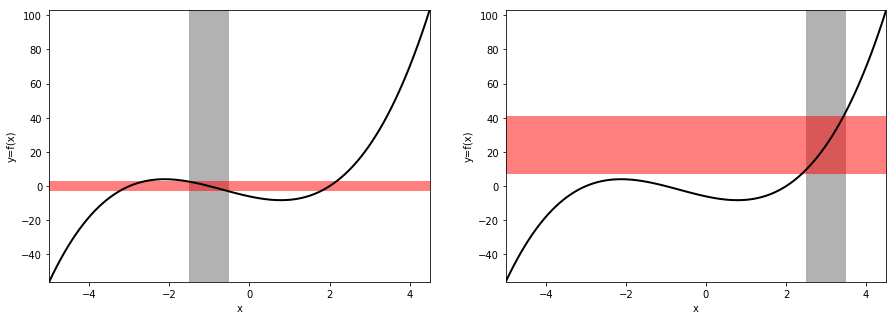

In [8]:
def plot_error_f(ax, func_f, x, delta_x, delta_y, x0):
    y0 = func_f(x0)
    xdelta = np.linspace(x0-delta_x, x0+delta_x, len(x))
    ydelta = np.linspace(y0-delta_y, y0+delta_y, len(x))
    y = func_f(x)
    ax.fill_between(xdelta, min(y), max(y), facecolor='k',
                    alpha=0.3, edgecolor='None')
    ax.fill_between(x, min(ydelta), max(ydelta),
                    facecolor='r', alpha=0.5, edgecolor='None')
    ax.plot(x, y, 'k', linewidth=2)

    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([min(y), max(y)])
    ax.set_xlabel('x')
    ax.set_ylabel('y=f(x)')

# Assin the x values to plot
x = np.linspace(-5, 4.5, 100)

# Create figure and plot
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
plot_error_f(axarr[0], func_f, x, delta_x, delta_y0, x0=x0)
plot_error_f(axarr[1], func_f, x, delta_x, delta_y1, x0=x1)
fig.show()


## Non-linear function of multiple variables

We can extend the framework developped above to function $f$ of \
multiple variables, $x_0,x_1,...x_i,...x_n$. When f is a set of \
non-linear combination of the variables x, an interval propagation \
could be performed in order to compute intervals which contain all \
consistent values for the variables. In a probabilistic approach, \
the function f must usually be linearized by approximation to a \
first-order Taylor series expansion, though in some cases, exact \
formulas can be derived that do not depend on the expansion as is \
the case for the exact variance of products. The Taylor expansion \
would be:

$$f_k \approx f^0_k+ \sum_i^n \frac{\partial f_k}{\partial {x_i}} x_i$$

where \partial f_k/\partial x_i denotes the partial derivative of fk \
with respect to the i-th variable, evaluated at the mean value of \
all components of vector x. Or in matrix notation,

$$\mathrm{f} \approx \mathrm{f}^0 + \mathrm{J} \mathrm{x}$$

where J is the Jacobian matrix. Since f_0 is a constant it does not \
contribute to the error on f. Therefore, the propagation of error \
follows the linear case, above, but replacing the linear \
coefficients, Aik and Ajk by the partial derivatives, \
$\frac{\partial f_k}{\partial x_i}$ and \
$\frac{\partial f_k}{\partial x_j}$. In matrix notation,

$$\mathrm{\Sigma}^\mathrm{f} = \mathrm{J}
\mathrm{\Sigma}^\mathrm{x} \mathrm{J}^\top$$

That is, the Jacobian of the function is used to transform the rows \
and columns of the variance-covariance matrix of the argument.